3


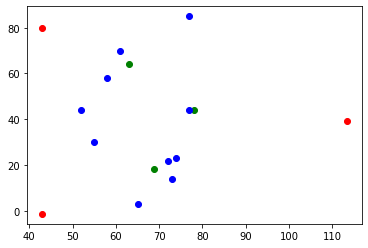

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import pylab
from IPython.display import display, clear_output


class Point:
    def __init__(self, x, y):
        self.x=x
        self.y=y
        self.cluster= -1
        self.previous_c= -1
        
    def set_cluster(self, number=-1):
        self.previous_c=self.cluster
        self.cluster = number
        
def dist(p1, p2):
     return np.sqrt((p1.x-p2.x)**2+(p1.y-p2.y)**2)#расстояние между точками
    
def randomPoints(n):#рандом точек
    points=[]
    for i in range(n):
        points.append(Point(np.random.randint(0,100), np.random.randint(0,100)))
    return points

def find_centroids(points, k):
    x = np.mean(list(map(lambda point: point.x, points)))
    y = np.mean(list(map(lambda point: point.y, points)))
    
    R=0
    for p in points:
        R = max(R, dist(p, Point(x, y)))
    
    centroids = []
    for i in range(k):
        centroids.append( Point( x+R*np.cos(2*np.pi*i/k), #возвращаем координаты центроидов
                                y+R*np.sin(2*np.pi*i/k)))
    return centroids


def find_center(points):
    x = np.mean(list(map(lambda point: point.x, points)))
    y = np.mean(list(map(lambda point: point.y, points)))
    
  
    centroid = Point(x+ np.cos(2*np.pi),
                           y+ np.sin(2*np.pi))
    
    return centroid


def find_cluster(points, centroids):#поиск принадлежности точки к центроиду
    k = len(centroids)
    l = len(points)
    distprev = 0
    distn=0
    
    for i in range(l):#берем каждую точку и находим расстояние до центроидов, выбираем минимальное и присваеваем к кластеру
        for j in range(k):
            if j==0:
                distprev = dist(points[i], centroids[j])
                points[i].cluster=j
                distn=distprev
            if j>0:
                distn = dist(points[i], centroids[j])
                if distprev>distn:
                    points[i].cluster=j
                    distprev=distn
                

def find_criterian(k, n, points, centroids, ax):
    criterian=0
    for j in range(k):
        pp=[]  
        for i in range(n):#находим центр масс для каждого из кластеров
            if points[i].cluster == j:
                pp.append(points[i])
            if pp:
                cent = find_center(pp)
                #centers.append(cent)
            else:
                cent= centroids[j]
        #cent = find_center(pp)
        for s in range(len(pp)):#находим критерий оптимальности
            criterian += (dist(cent, points[i]))**2 #сумма квадратов расстояний от точек до центров
        
        ax.scatter(cent.x, cent.y, color='g')
    return criterian
    
        

def find_min_criterian(criterians, n, k):#находим минимальный критерий
    minimum=abs(criterians[1]-criterians[2])/abs(criterians[0]-criterians[1])
    index = 2
    i = 2
    f=0
    while i<n-2:
        if criterians[i-1]-criterians[i]==0:
            continue
        else:
            f=abs(criterians[i]-criterians[i+1])/abs(criterians[i-1]-criterians[i])
            if minimum > f:
                minimum = f
                index +=1
            i+=1
    return index   
        

    

    
if __name__=="__main__":
    n=10 #кол-во точек
    k=3 #кол-во кластеров
    points=randomPoints(n)
    
    
    ind=0
    count=1
    criterians=[]
    
    fig = plt.figure()
    
    ax = fig.add_subplot(1, 1, 1) 
    
    while count<n:#берем кол-во кластеров от 1 до кол-во точек -1
        
        
        clear_output(wait = True)
        ax.cla()
        
        centroids= find_centroids(points, count) #находим центроиды для данного кол-ва кластеров
       
        find_cluster(points, centroids)#находим, к какому центроиду принадлежит каждая точка
        
        criterians.append(find_criterian(count, n, points, centroids,ax))
        
        ax.scatter(list(map(lambda point: point.x, centroids )),#центроиды
                           list(map(lambda point: point.y, centroids)), color='r')
        ax.scatter(list(map(lambda point: point.x, points )),#точки
               list(map(lambda point: point.y, points)), color='b')
        
       
        
        
        #centers.clear()
        display(fig)
  
        clear_output(wait = True)
        plt.pause(0.5)
        
        
        #fig.canvas.draw()

        #time.sleep(0.5)
        
        count+=1
 
    clear_output(wait = True)
    ax.cla() 
    

    ind=find_min_criterian(criterians, n, k)
    print(ind)

    centroids = find_centroids(points, ind)
    find_cluster(points, centroids)#находим, к какому центроиду принадлежит каждая точка
        
    find_criterian(ind, n, points, centroids,ax)
        
    ax.scatter(list(map(lambda point: point.x, centroids )),#центроиды
                           list(map(lambda point: point.y, centroids)), color='r')
    ax.scatter(list(map(lambda point: point.x, points )),#точки
               list(map(lambda point: point.y, points)), color='b')
    
    display(fig)
    
    
   
    